In [73]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from load_data import GetZeoliteTsv
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
np.random.seed(0)

In [2]:
#zeolite datafile exported from excel
zeolite_fname = "/home/drewx/Documents/Project-Roger-Dodger/Python-ML/zeolites database one febl14.txt"
#filename for datafile
zeolite_outfile = "ZeoX_Final_encoded.tsv" 

In [3]:
#open the raw tsv data file 
#the file has to be correctly formatted with columns headers  
zeolite_fileObj = open(zeolite_fname)

In [4]:
#create an instance to start processing the datafile
getZeo = GetZeoliteTsv(zeolite_fileObj, zeolite_outfile)

Index(['Adsorbent', 'SA', 'Vmicro', 'Vmeso', 'pore_size', 'Si_Al', 'Na', 'Ag',
       'Ce', 'Cu', 'Ni', 'Zn', 'Fe2', 'La', 'Cs', 'Pd', 'Nd', 'adsorbate',
       'C_0', 'solvent', 'oil_adsorbent_ratio', 'Temp', 'Capacity'],
      dtype='object')


In [5]:
#Sanity check of datatypes
#important to recognise that datatypes are detected from the files
#this step also make the string variables as categorical variables
getZeo.set_dtypes()

{'Adsorbent': 'category', 'adsorbate': 'category', 'solvent': 'category'}


,Adsorbent,SA,Vmicro,Vmeso,pore_size,Si_Al,Na,Ag,Ce,Cu,...,La,Cs,Pd,Nd,adsorbate,C_0,solvent,oil_adsorbent_ratio,Temp,Capacity
0,HFAU-5,NaN,0.2550,0.07,0.8000,2.600,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,100.0,25.0,36.416000
1,HFAU-17,NaN,0.2550,0.13,0.8000,13.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,20.0,25.0,10.176000
2,HFAU-47,NaN,0.2450,0.11,0.8000,34.000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,NaN,n-heptane,20.0,25.0,5.760000
3,CeY,590.00,0.2400,NaN,0.8100,2.100,NaN,NaN,2.62,NaN,...,NaN,NaN,NaN,NaN,TP,4.992000,n-heptane,1000.0,80.0,0.640000
4,CeY,590.00,0.2400,NaN,0.8100,2.100,NaN,NaN,2.62,NaN,...,NaN,NaN,NaN,NaN,BT,4.992000,n-heptane,1000.0,80.0,0.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,36.312849,iso-octane,20.0,30.0,5.767327
303,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,51.326816,iso-octane,20.0,30.0,6.336634
304,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,92.527933,iso-octane,20.0,30.0,6.980198
305,AgX-zeolite,230.16,0.1826,NaN,3.1729,1.031,NaN,0.297,NaN,NaN,...,NaN,NaN,NaN,NaN,TP,142.807263,iso-octane,20.0,30.0,7.376238


In [6]:
#this counts the missing records per column and saves them to provided filename
getZeo.missingness("ZeoX_Final_encoded.miss")

,Feature,Missingness
Adsorbent,Adsorbent,0.00
SA,SA,0.98
Vmicro,Vmicro,8.47
Vmeso,Vmeso,65.80
pore_size,pore_size,42.67
Si_Al,Si_Al,3.91
Na,Na,54.40
Ag,Ag,59.93
Ce,Ce,73.29
Cu,Cu,79.48


In [7]:
#take not of number of columns
getZeo.zeolite_df.shape

(307, 23)

In [8]:
#Drops empty columns inplace
getZeo.zeolite_df.dropna(how='all', axis=1, inplace = True)

In [9]:
#Very that columns have indeed been lost
getZeo.zeolite_df.shape

(307, 19)

In [10]:
#Imputation: step by step for easy debugging
getZeo.GroupMeanImputation('Adsorbent','SA')
#This last step takes care of singletons 
getZeo.MeanImputation('SA')

GroupMeanImputation: Adsorbent>>SA
MeanImputation: SA


In [11]:
getZeo.GroupMeanImputation('Adsorbent','Vmicro')
getZeo.MeanImputation('Vmicro')

GroupMeanImputation: Adsorbent>>Vmicro
MeanImputation: Vmicro


In [12]:
getZeo.GroupMeanImputation('Adsorbent','Vmeso')
getZeo.MeanImputation('Vmeso')

GroupMeanImputation: Adsorbent>>Vmeso
MeanImputation: Vmeso


In [13]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

GroupMeanImputation: Adsorbent>>pore_size
MeanImputation: pore_size


In [14]:
getZeo.GroupMeanImputation('Adsorbent','pore_size')
getZeo.MeanImputation('pore_size')

GroupMeanImputation: Adsorbent>>pore_size
MeanImputation: pore_size


In [15]:
getZeo.GroupMeanImputation('Adsorbent','Si_Al')
getZeo.MeanImputation('Si_Al')

GroupMeanImputation: Adsorbent>>Si_Al
MeanImputation: Si_Al


In [16]:
#Mean imputations only for these variables
#Names from column headers
for var in ["C_0","oil_adsorbent_ratio","Temp"]:
         getZeo.MeanImputation(var)

MeanImputation: C_0
MeanImputation: oil_adsorbent_ratio
MeanImputation: Temp


In [17]:
getZeo.zeolite_df.columns

Index(['Adsorbent', 'SA', 'Vmicro', 'Vmeso', 'pore_size', 'Si_Al', 'Na', 'Ag',
       'Ce', 'Cu', 'Ni', 'Zn', 'Cs', 'adsorbate', 'C_0', 'solvent',
       'oil_adsorbent_ratio', 'Temp', 'Capacity'],
      dtype='object')

In [18]:
#Fill missing values for metals with zeros
for metal in ['Na', 'Ag', 'Ce', 'Cu', 'Ni', 'Zn','Cs']:
         getZeo.zerofill(metal)

In [19]:
#convert the categorical variables to intergers also known as one-hot-encoding
#https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
getZeo.encode_categorical()

In [20]:
#save the new data to a tsv file
getZeo.save_zeo("ZeoX_Final_encoded.tsv")

In [21]:
#get our dataframe 
zeolite_final  = getZeo.zeolite_df

In [23]:
#check our dataframe
zeolite_final.shape

(307, 46)

In [24]:
#We extract our data features 
#attributes 
y = zeolite_final.loc[:,"Capacity"].values
#labels
X = zeolite_final.drop(["Capacity"], axis = 1).values

In [25]:
X

array([[4.93210921e+02, 2.55000000e-01, 7.00000000e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.93210921e+02, 2.55000000e-01, 1.30000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.93210921e+02, 2.45000000e-01, 1.10000000e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [2.30160000e+02, 1.82600000e-01, 1.90713855e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30160000e+02, 1.82600000e-01, 1.90713855e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.30160000e+02, 1.82600000e-01, 1.90713855e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [52]:
#Split our data into training and test dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [54]:
y_train.shape

(245,)

In [55]:
y_test.shape

(62,)

In [28]:
#Standardize features by removing the mean and scaling to unit variasnce
sc = StandardScaler()
#https://datascience.stackexchange.com/questions/12321/whats-the-difference-between-fit-and-fit-transform-in-scikit-learn-models#:~:text=%22fit%22%20computes%20the%20mean%20and,both%20at%20the%20same%20time.
#This should not make much of a difference but its good practice
#TO DO
#Compare accuracy with and without scaling
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
regressor = RandomForestRegressor(n_estimators=1000, random_state=0)
#TO DO
#increase n_estimators
#run in parallel

In [30]:
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [122]:
data_table = pd.DataFrame.from_dict({'y_pred': y_pred, 'y_test': y_test, 'errors': abs(y_pred - y_test)})

In [64]:
pd.options.display.max_rows = 4000

In [123]:
print(data_table)

        y_pred      y_test     errors
0    48.862466   54.000000   5.137534
1    30.326176   35.202098   4.875922
2   188.660285  197.660393   9.000109
3    26.563374   29.300268   2.736894
4    23.640700   24.125044   0.484344
5    13.576457   25.615385  12.038927
6    94.856515   88.225362   6.631152
7    39.010565   28.000000  11.010565
8   121.437624  106.240000  15.197624
9    44.464232   34.000000  10.464232
10  187.803746  183.091095   4.712651
11    2.731764    2.930000   0.198236
12   21.883822   21.927205   0.043383
13   35.839248   34.300000   1.539248
14   13.020250    3.261000   9.759250
15   16.605867   16.117314   0.488553
16   37.733064   34.900071   2.832993
17   13.006494    8.963689   4.042805
18   12.672987   10.456307   2.216680
19   32.806630   38.198270   5.391641
20    2.760855    1.979347   0.781508
21   21.303361   22.500000   1.196639
22   26.543648   29.730000   3.186352
23   39.714607   34.000000   5.714607
24    8.421633    7.440651   0.980982
25   22.2182

In [74]:
slope, intercept, r_value, p_value, std_err = stats.linregress(data_table)

In [82]:
print("Correlation coefficient (R): {:.4f} ".format(r_value))
print("p-value : {}".format(p_value))
print("Intercept: {:.4f}".format(intercept))
print("Slope: {:.4f}".format(slope))
print("std_eff: {:.4f}".format(std_err))

Correlation coefficient (R): 0.9548 
p-value : 2.6353539343729915e-33
Intercept: -1.4843
Slope: 0.9754
std_eff: 0.0392


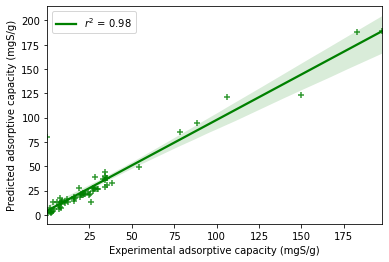

In [115]:
ax = sns.regplot(y="y_pred",
                 x="y_test", 
                 color="g", 
                 marker="+",
                 line_kws={'label':'$r^2$ = {:.2f}'.format(slope, intercept,r_value**2, p_value)},
                 data = data_table)

plt.ylabel('Predicted adsorptive capacity (mgS/g)')
plt.xlabel('Experimental adsorptive capacity (mgS/g)')

ax.legend()
plt.show()


In [116]:
plt.savefig('lm_r2.pdf', format='pdf', dpi=1200)

<Figure size 432x288 with 0 Axes>

In [110]:
fig.savefig('lm_r2.svg', format='svg', dpi=1200)

In [33]:
pd.DataFrame(y_pred).to_csv('y_pred.csv',  index = False)
pd.DataFrame(y_test).to_csv('y_test.csv', index = False)

In [35]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 5.302970572151715
Mean Squared Error: 139.38981175618508
Root Mean Squared Error: 11.806346249207884


In [117]:
errors = abs(y_pred - y_test)

In [118]:
errors

array([5.13753407e+00, 4.87592153e+00, 9.00010858e+00, 2.73689428e+00,
       4.84343802e-01, 1.20389273e+01, 6.63115238e+00, 1.10105654e+01,
       1.51976238e+01, 1.04642325e+01, 4.71265140e+00, 1.98236369e-01,
       4.33828262e-02, 1.53924790e+00, 9.75924965e+00, 4.88553309e-01,
       2.83299302e+00, 4.04280499e+00, 2.21668032e+00, 5.39164058e+00,
       7.81508225e-01, 1.19663904e+00, 3.18635238e+00, 5.71460708e+00,
       9.80981799e-01, 1.09822658e+00, 1.31450236e+00, 6.86977276e-01,
       4.39850932e+00, 5.44189304e+00, 1.10827577e-02, 2.83299798e+00,
       4.28773912e+00, 8.96649245e-01, 1.21995900e+00, 3.76274256e+00,
       1.05910057e+00, 2.68018916e+00, 4.27168234e+00, 3.39263267e+00,
       2.65776985e+00, 8.60532402e+00, 2.31606783e+00, 7.99069356e+01,
       9.17968901e-01, 3.35888228e-01, 8.31910411e-01, 5.44242523e+00,
       9.69755380e+00, 5.53313017e+00, 1.62183454e+00, 1.30903111e+00,
       2.35741709e+00, 7.44930751e+00, 5.26333125e-03, 3.66380000e-01,
      

In [37]:
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: -1009.59 %.


In [ ]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_


# summarize feature importance
for i,v in enumerate(importance):
	print('[%s]\tFeature: %0d, Score: %.5f' % (X.columns[i], i,v))
#plot feature importance
#pyplot.bar([x for x in range(len(importance))], importance)
#pyplot.bar([x for x in X.columns], importance)

pyplot.show()
#print([x for x in range(len(importance))])

?pyplot.bar

In [ ]:
X = zeolite_final.drop(["Capacity"], axis = 1)
X.iloc[:,19]

In [ ]:
X = zeolite_final.drop(["Capacity"], axis = 1)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')

In [ ]:
?feat_importances.nlargest

In [96]:
?sns.regplot